In [14]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import multivariate_normal


In [15]:
def ComputeMean(data):
    """Input : n dimensional numpy array
        Output : mean"""
    return np.sum(data,axis=0)/len(data)

def ComputePrior(labels):
    """Inputs: label NumPy array"""
    _, counts = np.unique(labels, return_counts=True)
    prior_probabilities = counts / len(labels)
    return prior_probabilities

def Covariance(data):
    """Input: numpy array of n-dim"""
    N, M = data.shape
    cov = np.zeros((M, M))
    for i in range(M):
        mean_i = np.sum(data[:, i]) / N
        for j in range(M):
            mean_j = np.sum(data[:, j]) / N
            cov[i, j] = np.sum((data[:, i] - mean_i) * (data[:, j] - mean_j)) / (N - 1)
  
    return cov      

def computeLikelihood(data, class_mean, class_cov):
    return multivariate_normal.pdf(data,class_mean,class_cov)


In [9]:
def preprocess_data(train_data_path,test_data_path):

    train_data = np.loadtxt(train_data_path, delimiter=',')
    train_features = train_data[:, :-1]
    train_labels = train_data[:, -1].astype(int)

    test_data = np.loadtxt(test_data_path, delimiter=',')
    test_features = test_data[:, :-1]
    test_labels = test_data[:, -1].astype(int)
    print(train_labels)

    uniq_class = np.unique(train_labels)
    mean_dict = {}
    cov_dict = {}
    prior_dict = {}
    prior = []
    prior = ComputePrior(train_labels)

    for cls in uniq_class:
        class_data = train_features[train_labels == cls]
        mean_dict[cls] = ComputeMean(class_data)
        cov_dict[cls] = Covariance(class_data)
        prior_dict[cls] = prior[cls-1] 




        


    print(mean_dict)
    print(cov_dict)
    print(prior_dict)

    x_min, x_max = train_features[:, 0].min() - 1, train_features[:, 0].max() + 1
    y_min, y_max = train_features[:, 1].min() - 1, train_features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    return xx ,yy ,train_labels ,train_features ,uniq_class , mean_dict,cov_dict,prior_dict

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal



def plot(xx,yy,mean_dict,cov_dict):




    pos1 = np.empty(xx.shape + (2,))
    pos1[:, :, 0] = xx
    pos1[:, :, 1] = yy


    pos2 = np.empty(xx.shape + (2,))
    pos2[:, :, 0] = xx
    pos2[:, :, 1] = yy

    pos3 = np.empty(xx.shape + (2,))
    pos3[:, :, 0] = xx
    pos3[:, :, 1] = yy

    LL1 = multivariate_normal.pdf(pos1,mean_dict[1],cov_dict[1])
    LL2 = multivariate_normal.pdf(pos2,mean_dict[2],cov_dict[2])
    LL3 = multivariate_normal.pdf(pos3,mean_dict[3],cov_dict[3])

    # LL1 = ComputeLiklihood(pos,class_1_mean,class_1_covariance)

    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(2,1,1,projection='3d')

    ax1.plot_surface(xx, yy, LL1, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.coolwarm)
    ax1.plot_surface(xx, yy, LL2, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.viridis)
    ax1.plot_surface(xx, yy, LL3, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.plasma)

    ax1.view_init(45,70)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_zticks([])
    ax1.set_xlabel(r'$x_1$')
    ax1.set_ylabel(r'$x_2$')
    ax1.set_title("Surface Plot for LSD for case 1")





    ax2 = fig.add_subplot(2,1,2,projection='3d')
    ax2.contourf(xx, yy, LL1, zdir='z', offset=0, cmap=cm.coolwarm)
    ax2.contourf(xx, yy, LL2, zdir='z', offset=0, cmap=cm.viridis)
    ax2.contourf(xx, yy, LL3, zdir='z', offset=0, cmap=cm.plasma)

    ax2.view_init(45,70)

    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_zticks([])
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylabel(r'$x_2$')
    ax2.set_title("Cotour plot of LSD with Case 1")
    plt.show()

[1 1 1 ... 3 3 3]
{1: array([26.10141771, 23.916872  ]), 2: array([24.74404571, 25.05629143]), 3: array([14.14771257, 39.85515429])}
{1: array([[51.55986106,  8.24758231],
       [ 8.24758231, 44.28784134]]), 2: array([[5.25536251, 0.08088763],
       [0.08088763, 6.8015004 ]]), 3: array([[23.81339307,  1.12367789],
       [ 1.12367789, 22.93995337]])}
{1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333}


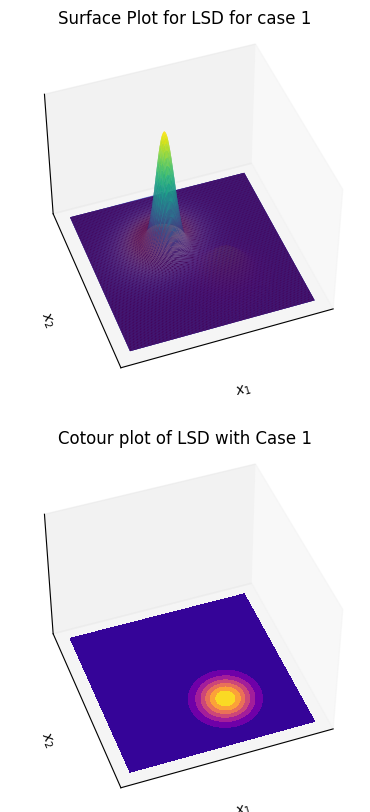

In [11]:
train_data_path = 'PRML_ass1_data/NonLinearlySeperableData/40/train.txt'
test_data_path ='PRML_ass1_data/NonLinearlySeperableData/40/train.txt'
xx ,yy ,train_labels ,train_features ,uniq_class , mean_dict,cov_dict,prior_dict = preprocess_data(train_data_path,test_data_path)
plot(xx,yy,mean_dict,cov_dict)

In [17]:

def plot_decision_boundaries(mean_dict,cov_dict,prior_dict,uniq_class):
    # Initialize a plot counter
    plot_counter = 1
    
    fig, axs = plt.subplots(4, 1, figsize=(12, 40))
    
    for case in range(1, 5):
        # plt.figure(figsize=(12, 10))
        ax = axs[case - 1]
        # Iterate through the two datasets
        # for dataset in range(1, 3):
        plt.subplot(4, 1, plot_counter)

        # Case 1: Bayes classifier with the same covariance matrix for all classes.
        if case == 1:
            common_cov = np.mean(list(cov_dict.values()), axis=0)
            # common_mean = mean_dict[dataset]
            decision_boundary = np.zeros(xx.shape)
            for i in range(xx.shape[0]):
                for j in range(xx.shape[1]):
                    data_point = np.array([xx[i, j], yy[i, j]])
                    likelihoods = [(prior_dict[cls]*computeLikelihood(data_point, mean_dict[cls], common_cov)) for cls in uniq_class]
                    decision_boundary[i, j] = uniq_class[np.argmax(likelihoods)]

        # Case 2: Bayes classifier with different covariance matrix across uniq_class.
        elif case == 2:
            decision_boundary = np.zeros(xx.shape)
            for i in range(xx.shape[0]):
                for j in range(xx.shape[1]):
                    data_point = np.array([xx[i, j], yy[i, j]])
                    likelihoods = [(prior_dict[cls]*computeLikelihood(data_point, mean_dict[cls], cov_dict[cls])) for cls in uniq_class]
                    decision_boundary[i, j] = uniq_class[np.argmax(likelihoods)]

        # Case 3: Naive Bayes classifier with the same covariance matrix for all uniq_class.
        elif case == 3:
            common_sigma_squared = np.mean(np.diag(list(cov_dict.values())[0]))
            common_cov = np.eye(2) * common_sigma_squared
            # common_mean = mean_dict[dataset]
            decision_boundary = np.zeros(xx.shape)
            for i in range(xx.shape[0]):
                for j in range(xx.shape[1]):
                    data_point = np.array([xx[i, j], yy[i, j]])
                    likelihoods = [(prior_dict[cls]*computeLikelihood(data_point, mean_dict[cls], common_cov)) for cls in uniq_class]
                    decision_boundary[i, j] = uniq_class[np.argmax(likelihoods)]

        # Case 4: Naive Bayes classifier with S of the above form, but being different across uniq_class.
        elif case == 4:
            decision_boundary = np.zeros(xx.shape)
            for i in range(xx.shape[0]):
                for j in range(xx.shape[1]):
                    data_point = np.array([xx[i, j], yy[i, j]])
                    likelihoods = [(prior_dict[cls]*computeLikelihood(data_point, mean_dict[cls], np.eye(2) * np.mean(np.diag(cov_dict[cls])))) for cls in uniq_class]
                    decision_boundary[i, j] = uniq_class[np.argmax(likelihoods)]

        # Plot the decision boundary
        # plt.contourf(xx, yy, decision_boundary, alpha=0.4)
        ax.contourf(xx, yy, decision_boundary, alpha=0.4)


        # Plot the training data points
        for cls in uniq_class:
            plt.scatter(train_features[train_labels == cls][:, 0], train_features[train_labels == cls][:, 1], label=f'Class {cls}')
            ax.scatter(train_features[train_labels == cls][:, 0], train_features[train_labels == cls][:, 1], label=f'Class {cls}')



        ax.set_title(f'Case {case}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend()
    plt.savefig("decision_boundary For Linearly Seperable data")

    plt.show()


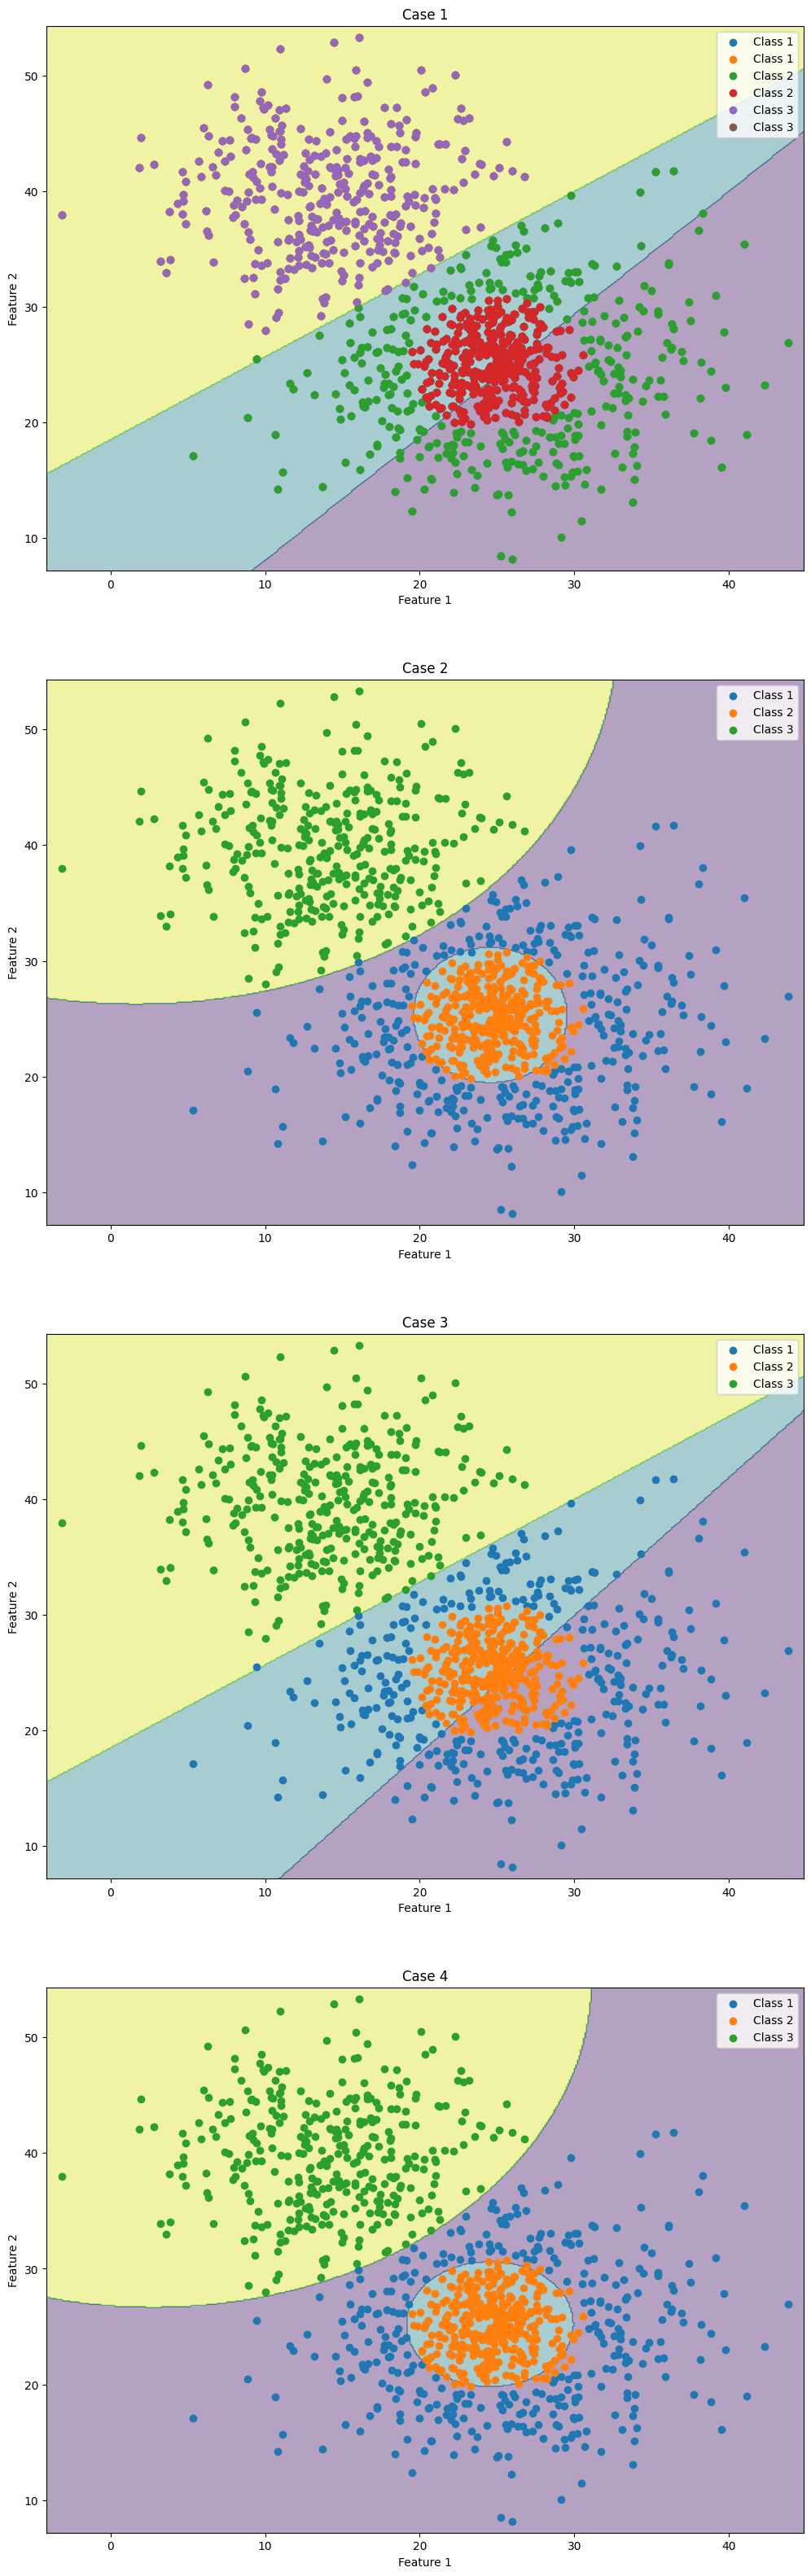

In [18]:
plot_decision_boundaries(mean_dict,cov_dict,prior_dict,uniq_class)

[1 1 1 ... 3 3 3]
{1: array([ 0.11049909, -0.14947142]), 2: array([10.665218, 10.511364]), 3: array([11.24764371, -7.81517003])}
{1: array([[ 4.00120544, -1.97041452],
       [-1.97041452,  2.2065844 ]]), 2: array([[ 3.4193959 , -2.30650294],
       [-2.30650294,  3.42358592]]), 3: array([[3.81993808, 2.86737734],
       [2.86737734, 3.82415238]])}
{1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333}


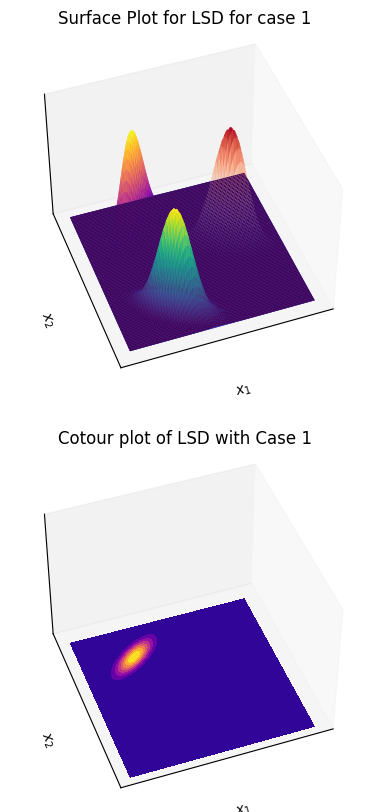

(307, 253)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal


# Due to last minute changes unable to reproduce the plots given in the pdf




# Our 2-dimensional distribution will be over variables X and Y
def plot(xx,yy,mean_dict,cov_dict):




    # Pack X and Y into a single 3-dimensional array
    pos1 = np.empty(xx.shape + (2,))
    pos1[:, :, 0] = xx
    pos1[:, :, 1] = yy


    pos2 = np.empty(xx.shape + (2,))
    pos2[:, :, 0] = xx
    pos2[:, :, 1] = yy

    pos3 = np.empty(xx.shape + (2,))
    pos3[:, :, 0] = xx
    pos3[:, :, 1] = yy

    LL1 = multivariate_normal.pdf(pos1,mean_dict[1],cov_dict[1])
    LL2 = multivariate_normal.pdf(pos2,mean_dict[2],cov_dict[2])
    LL3 = multivariate_normal.pdf(pos3,mean_dict[3],cov_dict[3])

    # LL1 = ComputeLiklihood(pos,class_1_mean,class_1_covariance)

    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(2,1,1,projection='3d')

    ax1.plot_surface(xx, yy, LL1, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.coolwarm)
    ax1.plot_surface(xx, yy, LL2, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.viridis)
    ax1.plot_surface(xx, yy, LL3, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.plasma)

    ax1.view_init(45,70)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_zticks([])
    ax1.set_xlabel(r'$x_1$')
    ax1.set_ylabel(r'$x_2$')
    ax1.set_title("Surface Plot for LSD for case 1")





    ax2 = fig.add_subplot(2,1,2,projection='3d')
    ax2.contourf(xx, yy, LL1, zdir='z', offset=0, cmap=cm.coolwarm)
    ax2.contourf(xx, yy, LL2, zdir='z', offset=0, cmap=cm.viridis)
    ax2.contourf(xx, yy, LL3, zdir='z', offset=0, cmap=cm.plasma)

    ax2.view_init(45,70)

    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_zticks([])
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylabel(r'$x_2$')
    ax2.set_title("Cotour plot of LSD with Case 1")
    plt.show()

    print(LL1.shape)

train_data_path = 'PRML_ass1_data/LinearlySeperableData/40/train.txt'
test_data_path ='PRML_ass1_data/LinearlySeperableData/40/train.txt'
xx ,yy ,train_labels ,train_features ,uniq_class , mean_dict,cov_dict,prior_dict = preprocess_data(train_data_path,test_data_path)
plot(xx,yy,mean_dict,cov_dict)